# Customer Segmentation Using RFM Analysis

This notebook demonstrates customer segmentation using RFM (Recency, Frequency, Monetary) analysis. 
Key steps:
- Data preprocessing: Adding the recency field.
- Standardizing data for clustering.
- Using the K-Means algorithm to determine optimal customer segments.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

customer_data = pd.read_csv('/home/vashinav/Documents/Data/Customer_Segmentation/Customer_Segmentation_Dataset.csv')

## Adds Recency Field

In [2]:
customer_data['LastPurchaseDate'] = pd.to_datetime(customer_data['LastPurchaseDate'])
currentdate = pd.to_datetime("today")
customer_data['Recency'] = (currentdate - customer_data['LastPurchaseDate']).dt.days

## Tranform data for RFM analysis

In [3]:
rfm_data = customer_data[['Recency', 'PurchaseFrequency', 'TotalSpend']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)
customer_data[['Recency', 'PurchaseFrequency', 'TotalSpend']] = rfm_scaled

## Determine the optimal number of clusters

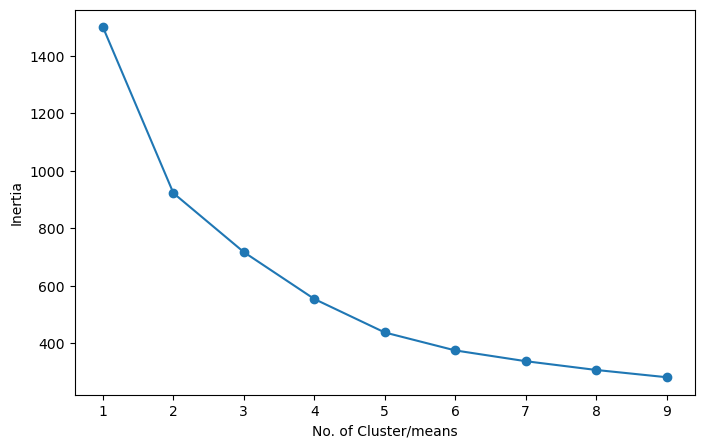

In [4]:
k_values = range(1,10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('No. of Cluster/means')
plt.ylabel('Inertia')
plt.show()

### K will be 4 in this case

In [5]:
kmeans = KMeans(n_clusters=5)
customer_data['Cluster'] = kmeans.fit_predict(rfm_scaled)
# Saving the Data to a csv
customer_data.to_csv("Segmented_Customers.csv", index=False)